In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#output_file = "/net/vast-storage.ib.cluster/scratch/scratch/Mon/fabiocat/rer_wer/data/output.csv"
output_file = "../../data/output.csv"

df_output = pd.read_csv(output_file)

df_output = df_output[df_output['expected_text'].notnull()]

# Extracting the 'task' information from the 'file' column
df_output['task'] = df_output['file'].str.extract(r'(task-[^/]+)')

# Overall mean and standard deviation of WER
overall_mean_wer = df_output['wer'].mean()
overall_stdev_wer = df_output['wer'].std()

# Mean and standard deviation of WER by task for score > 0.5
wer_by_task = df_output.groupby('task')['wer'].agg(['mean', 'std']).reset_index()

# Mean, standard deviation, and count of WER by grade
wer_by_grade = df_output.groupby('grade')['wer'].agg(['mean', 'std', 'count']).reset_index()

# Mean, standard deviation, and count of WER by school
wer_by_school = df_output.groupby('school')['wer'].agg(['mean', 'std', 'count']).reset_index()

# Mean and standard deviation of WER by file
wer_by_file = df_output.groupby('file')['wer'].agg(['mean', 'std']).reset_index()

# Mean, standard deviation, and count of WER by child
wer_by_child = df_output.groupby('identifier')['wer'].agg(['mean', 'std', 'count']).reset_index()

# Mean and standard deviation of WER by child and then by school
wer_by_child_school = df_output.groupby(['identifier', 'school'])['wer'].agg(['mean', 'std']).reset_index()

# Plotting
def plot_stats(df, title, xlabel=None):
    # Sort the DataFrame based on 'mean' values
    df_sorted = df.sort_values(by='mean')
    
    if xlabel:
        x_values = df_sorted[xlabel]
    else:
        x_values = df_sorted.index

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x_values, df_sorted['mean'], yerr=df_sorted['std'], capsize=5)
    ax.set_title(f'Mean and Std Dev of WER by {title}')
    if xlabel:
        ax.set_xlabel(xlabel)
    else:
        ax.set_xticklabels([])
    ax.set_ylabel('WER')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [4]:
# Overall WER stats
print(f"Overall Mean WER: {overall_mean_wer}")
print(f"Overall Std Dev WER: {overall_stdev_wer}")

Overall Mean WER: 1.3049090179428697
Overall Std Dev WER: 2.6195666611160022


In [5]:
print("WER by task:")
print(wer_by_task.sort_values(by='mean'))

WER by task:
                      task      mean       std
3  task-SentenceRepetition  0.192605  0.384601
0            task-Blending  0.984800  2.780022
1            task-Deletion  1.223936  3.010066
2   task-NonwordRepetition  2.712067  2.857390


In [6]:
# Print WER stats by child
print("WER by Child:")
print(wer_by_child.sort_values(by='mean'))

WER by Child:
        identifier       mean        std  count
2186  66_19_0_1150   0.000000        NaN      1
828   11_22_0_4047   0.000000   0.000000      2
963   11_22_0_4183   0.000000   0.000000      7
993   11_22_0_4213   0.000000   0.000000      3
1012  11_22_0_4232   0.000000   0.000000     12
...            ...        ...        ...    ...
1436   22_18_0_137   9.000000        NaN      1
1408   22_18_0_093  10.000000        NaN      1
2368  66_21_0_3137  10.200000  18.912959      5
1455   22_18_0_173  10.571429  23.649222      7
501   11_20_0_2332  12.625000  19.144625     16

[2657 rows x 4 columns]


In [7]:
# Print WER stats by school
print("WER by School:")
print(wer_by_school.sort_values(by='mean'))

WER by School:
                     school      mean       std  count
80                 Woodward  0.015296  0.042334     58
30                 FLVS - K  0.238095  0.387737      6
50  FLVS VanDeursen - White  0.514911  1.056505     24
48       FLVS Murtha-Rankin  0.598105  1.296153     78
81                      Zeh  0.608028  1.236383    149
..                      ...       ...       ...    ...
29                 FLVS - J  1.635001  3.905435     74
2                    Bagdad  1.662090  2.071330    285
19                 FLVS - A  1.955728  5.360428    222
7                Cherryvale  2.031684  2.496340   1343
52           FLVS- Frantzis  2.072119  4.223967     64

[82 rows x 4 columns]


In [8]:
# Print WER stats by grade
print("WER by Grade:")
print(wer_by_grade.sort_values(by='mean'))

WER by Grade:
  grade      mean       std  count
2     3  0.141341  0.322222   1907
1     2  1.124642  2.243672   8609
3    KG  1.274754  2.848225  41617
0     1  1.598765  2.288753  17103


### Plotting for different groupings


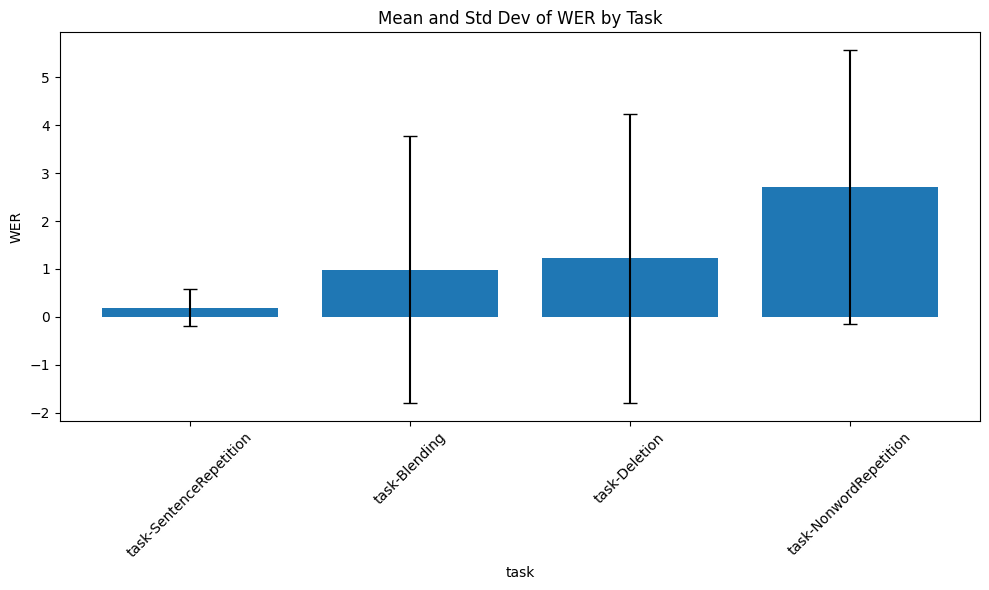

In [9]:
plot_stats(wer_by_task, 'Task', 'task')

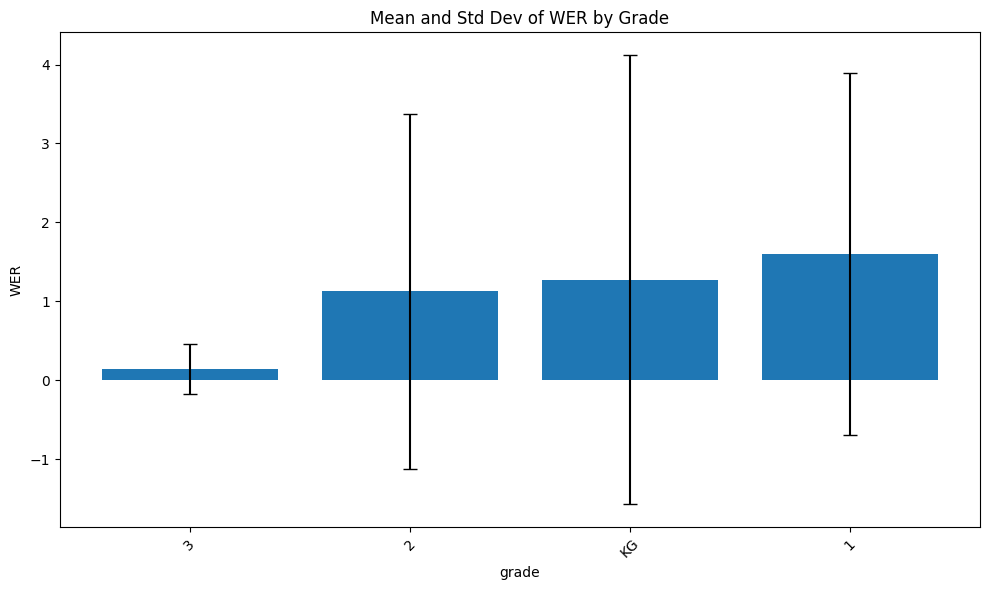

In [10]:
plot_stats(wer_by_grade, 'Grade', 'grade')

In [22]:
#plot_stats(wer_by_file, 'File')

# Pick 10,000 random values from the dataframe
df_output_sorted = df_output.sample(n=int(len(df_output)*0.01), random_state=42)

# Sort the dataframe by 'wer'
df_output_sorted = df_output_sorted.sort_values(by='wer')
df_output_sorted = df_output_sorted.reset_index(drop=True)
df_output_sorted

,file,school,grade,score,identifier,expected_text,transcription,wer,task
0,/om2/scratch/Sun/fabiocat/rer_wer/data/data/su...,Maclay,KG,1.0,11_18_0_0028,old,old,0.0,task-Deletion
1,/om2/scratch/Sun/fabiocat/rer_wer/data/data/su...,Central,KG,1.0,33_0_19_1078,shell,shell,0.0,task-Deletion
2,/om2/scratch/Sun/fabiocat/rer_wer/data/data/su...,FLVS - FLEX,KG,1.0,11_22_0_4335,rabbit,rabbit,0.0,task-Blending
3,/om2/scratch/Sun/fabiocat/rer_wer/data/data/su...,Kate Sullivan,1,1.0,11_22_0_4542,The worker already finished all his projects f...,the worker already finished all his projects f...,0.0,task-SentenceRepetition
4,/om2/scratch/Sun/fabiocat/rer_wer/data/data/su...,Community Christian School,1,1.0,11_18_0_0005,What do you want to do after reading this book?,what do you want to do after reading this book,0.0,task-SentenceRepetition
...,...,...,...,...,...,...,...,...,...
687,/om2/scratch/Sun/fabiocat/rer_wer/data/data/su...,Willow Drive,KG,1.0,66_19_0_1046,football,foot ba a ball this is foot ball foot ball,10.0,task-Blending
688,/om2/scratch/Sun/fabiocat/rer_wer/data/data/su...,FLVS - M,KG,1.0,11_21_0_3169,frog,can you say this one again for me one more time,11.0,task-Blending
689,/om2/scratch/Sun/fabiocat/rer_wer/data/data/su...,Crosswell Drive,KG,1.0,66_21_0_3065,black,i am going to show you something interesting a...,12.0,task-Blending
690,/om2/scratch/Sun/fabiocat/rer_wer/data/data/su...,FSUS,KG,1.0,11_22_0_4084,umbrella,tell me the truth like bruce you just saw how ...,13.0,task-Blending


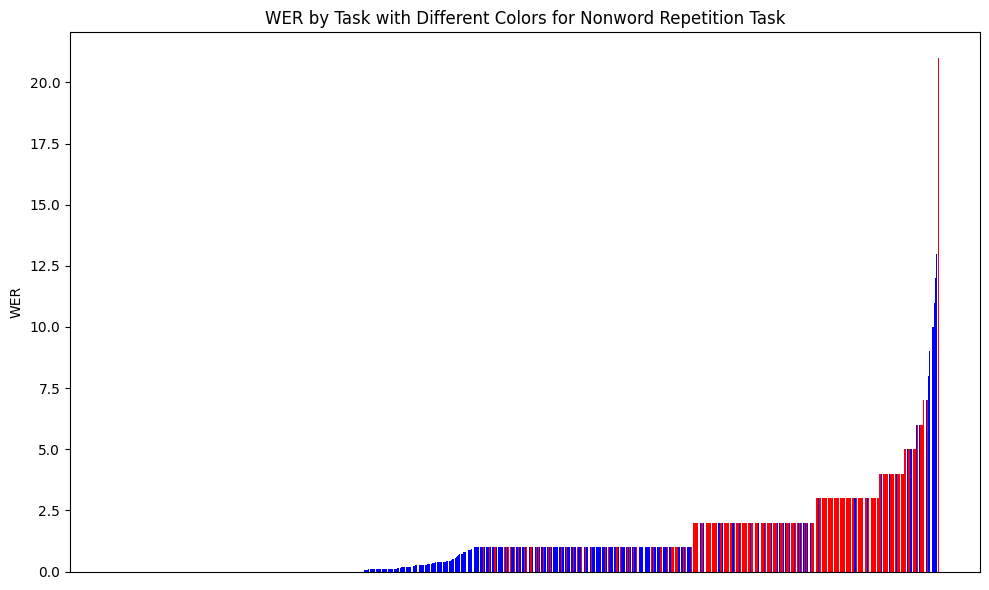

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Define colors for the barplot using numpy for better performance
tasks = df_output_sorted['task'].values
colors = np.where(tasks == 'task-NonwordRepetition', 'red', 'blue')

# Create the barplot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(df_output_sorted.index, df_output_sorted['wer'], color=colors, capsize=5)

ax.set_ylabel('WER')
ax.set_title('WER by Task with Different Colors for Nonword Repetition Task')
ax.set_xticks([])  # This hides x-axis labels

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
plot_stats(wer_by_school, 'School', 'school')

In [ ]:
plot_stats(wer_by_child, 'Child')

In [ ]:
df_output.sort_values(by='wer')